## Group Name: NLP Group 89
 
    1. Pooja Patila (2023aa05194)
    2. Kashyap Rajpurohit (2023ab05027)
    3. MEGHA AGGARWAL (2023aa05383)
    4. RamaKrishna C (2023ab05177)
    
 ## Dataset Name: FinancialPhraseBank

## **Task 1**
<!--  -->
EDA includes two steps 
1. Data Load and Summarization
   - Load the dataset and check the first few rows to understand its structure.
   - Print the summary statistics / desriptive statistics
   - distribution of the Sentiment - a historgram / barchart to understand the class balance 
   - Text Length Analysis - Analyze the length of news headlines to understand the distribution of text
     lengths.
   - Word Cloud - Generate a word cloud to visualize the most common words in the news headlines.
  
2. Pre-processing
   Text Cleaning and Normalization 
        Text Cleaning - Clean the text by removing punctuation, converting to lowercase, and removing stopwords.
        Text Normalization - helps in reducing the complexity and variability in the text data.
        Converting text to a standard format. This can include converting accented characters to their non-accented counterparts, handling special
           characters, etc.
    
    1. Handling Missing Values - Drop or fill missing values if any.
    2. Lowercasing - Converting all characters to lowercase to ensure uniformity.
    3. Removing Punctuation - Eliminating punctuation marks from the text.
    4. Removing Stopwords - Removing common words that do not contribute much to the meaning (e.g., “and”, “the”).
    5. Removing Numbers - Eliminating numerical values from the text.
    6. Stemming - Reducing words to their root form. For example, “running” becomes “run”.
    7. Lemmatization - Reducing words to their base or dictionary form. For example, “better” becomes “good”.
    8. Handling Contractions - Expanding contractions to their full form. For example, “don’t” becomes “do not”.
    9. Removing Extra Whitespace - Removing leading, trailing, and extra spaces between words.
    10. Removing Accented Characters - Convert accented characters to their non-accented counterparts.
    11. Removing Special Characters - Remove special characters from the text.
    12. Tokenization - Splitting text into individual words or tokens. This can be done at the word level or sentence level.
    13. Encoding Sentiment = Encode the sentiment column if it’s categorical.


In [2]:
# !pip install numpy pandas matplotlib pillow wordcloud
# !pip install nltk spacy

In [34]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

### Dataload and Summarization

Describe the dataset to get summary statistics for numerical columns (if any).

In [1]:

#df.style

### Select the first 2000 rows 

In [52]:
colnames = ['sentiment', 'news_headline']
df = pd.read_csv("all-data.csv",  names=colnames, encoding="windows_1258")
df2k = df.iloc[:2000, :]

#### Dataset Structure

In [55]:
print (df.columns)
print (df.dtypes)

Index(['sentiment', 'news_headline'], dtype='object')
sentiment        object
news_headline    object
dtype: object


#### Summary Statistics

In [62]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentiment      4846 non-null   object
 1   news_headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None


In [64]:
print(df.describe())

       sentiment                                      news_headline
count       4846                                               4846
unique         3                                               4838
top      neutral  TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq        2879                                                  2


#### Distribution of Sentiment

Visualize the distribution of the sentiment column to understand the class balance.

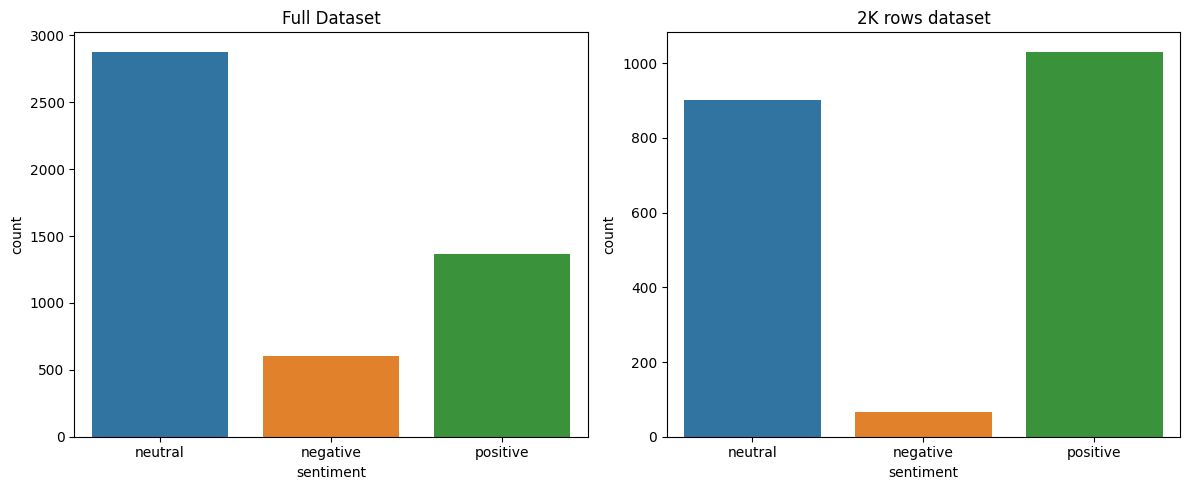

In [66]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot on the first subplot using Seaborn
sns.countplot(x='sentiment', data=df, ax=ax1)
ax1.set_title('Full Dataset')

# Plot on the second subplot using Seaborn
sns.countplot(x='sentiment', data=df2k, ax=ax2)
ax2.set_title('2K rows dataset')

# Display the plots
plt.tight_layout()
plt.show()

#### Text Length Analysis
Analyze the length of news headlines to understand the distribution of text lengths.

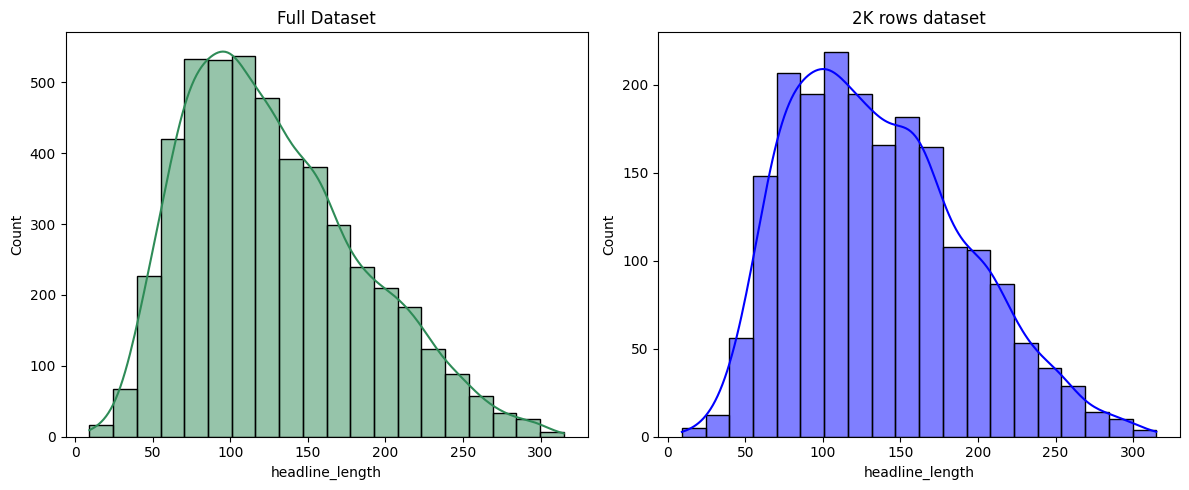

In [68]:
df['headline_length'] = df['news_headline'].apply(len)
df2k['headline_length'] = df2k['news_headline'].apply(len)
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot on the first subplot using Seaborn
sns.histplot(df['headline_length'], bins=20, ax=ax1, kde=True, color='seagreen')
ax1.set_title('Full Dataset')

# Plot on the second subplot using Seaborn
sns.histplot(df2k['headline_length'], bins=20, ax=ax2, kde=True, color='blue')
ax2.set_title('2K rows dataset')

# Display the plots
plt.tight_layout()
plt.show()

In [24]:
df.head(3)

,sentiment,news_headline,headline_length
0,neutral,"According to Gran , the company has no plans t...",127
1,neutral,Technopolis plans to develop in stages an area...,190
2,negative,The international electronic industry company ...,228


#### Word Cloud
Generate a word cloud to visualize the most common words in the news headlines.

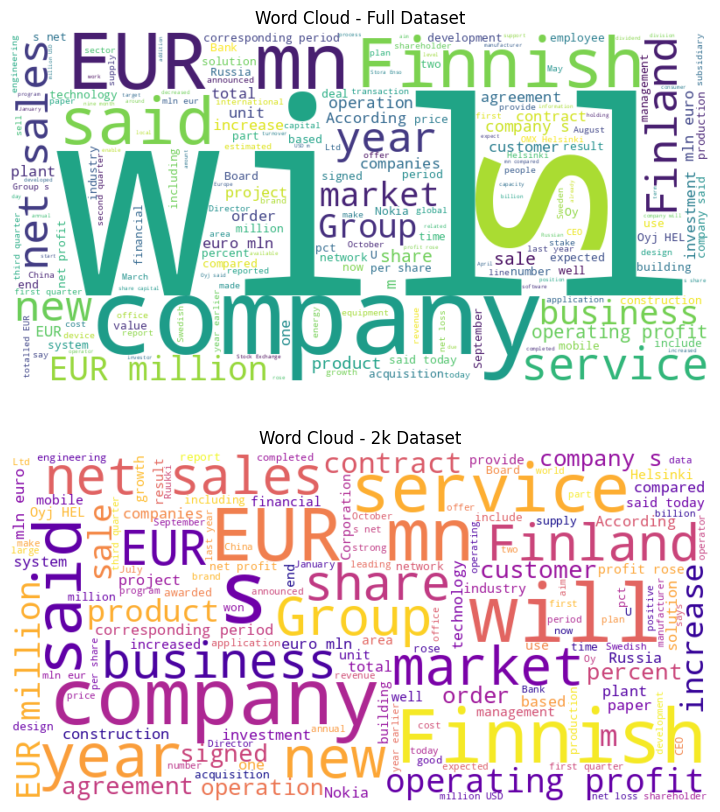

In [70]:
# Combine all headlines into a single string
all_headlines = ' '.join(df['news_headline'])
all_headlines_2k = ' '.join(df2k['news_headline'])

# Generate the word cloud
wordcloud1 = WordCloud(width=800, 
                       height=400, 
                       background_color='white', 
                       colormap='viridis'
                      ).generate(all_headlines)

wordcloud2 = WordCloud(width=800,
                       height=400,
                       max_font_size=100,
                       min_font_size=10,
                       background_color='white',
                       colormap='plasma'
                      ).generate(all_headlines_2k)
# Plot the word clouds one below the other
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
# Display the first word cloud
axes[0].imshow(wordcloud1, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title('Word Cloud - Full Dataset')
# Display the second word cloud
axes[1].imshow(wordcloud2, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title('Word Cloud - 2k Dataset')
plt.show()

## 2. Preprocessing Steps


#### Text Cleaning and Normalization 
Text Cleaning - Clean the text by removing punctuation, converting to lowercase, and removing stopwords.
Text Normalization - helps in reducing the complexity and variability in the text data.
Converting text to a standard format. This can include converting accented characters to their non-accented counterparts, handling special characters, etc.

1. Handling Missing Values - Drop or fill missing values if any.
2. Lowercasing - Converting all characters to lowercase to ensure uniformity.
3. Removing Punctuation - Eliminating punctuation marks from the text.
4. Removing Stopwords - Removing common words that do not contribute much to the meaning (e.g., “and”, “the”).
5. Removing Numbers - Eliminating numerical values from the text.
6. Stemming - Reducing words to their root form. For example, “running” becomes “run”.
7. Lemmatization - Reducing words to their base or dictionary form. For example, “better” becomes “good”.
8. Handling Contractions - Expanding contractions to their full form. For example, “don’t” becomes “do not”.
9. Removing Extra Whitespace - Removing leading, trailing, and extra spaces between words.
10. Removing Accented Characters - Convert accented characters to their non-accented counterparts.
11. Removing Special Characters - Remove special characters from the text.
12.  Tokenization - Splitting text into individual words or tokens. This can be done at the word level or sentence level.

13. Encoding Sentiment = Encode the sentiment column if it’s categorical.

In [77]:
import string
# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usha_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usha_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\usha_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**1. Handling Missing Values - Drop or fill missing values if any.**
   
    Drop rows with missing values
    Alternatively, fill missing values
    df['news headline'].fillna('', inplace=True)

In [79]:
# Handling missing values - Drop rows with missing values
df2k.dropna(inplace=True)

**2. Lowercasing - Converting all characters to lowercase to ensure uniformity.**

**3. Removing Punctuation - Eliminating punctuation marks from the text.**

In [83]:
import string
# convert all characters to lowercase
df2k ['news_headline'] = df2k ['news_headline'].str.lower()
df2k ['news_headline'] = df2k ['news_headline'].str.translate(str.maketrans('', '', string.punctuation))
print(f"After Lowercasing: \n{df2k ['news_headline'].head(5)}")

After Lowercasing: 
0    according to gran  the company has no plans to...
1    technopolis plans to develop in stages an area...
2    the international electronic industry company ...
3    with the new production plant the company woul...
4    according to the company s updated strategy fo...
Name: news_headline, dtype: object


#### 4. Removing Stopwords - Removing common words that do not contribute much to the meaning (e.g., “and”, “the”).
#### 5. Removing Numbers - Eliminating numerical values from the text.

In [86]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df2k['cleaned_headline'] = df2k['news_headline'].apply(clean_text)

In [88]:
# removing numbers 
import re
df2k['cleaned_headline'] = df2k['cleaned_headline'].str.replace(r'\d+', '', regex=True)

#### Tokenizing, Stemming, and Lemmatizing

6. Stemming - Reducing words to their root form. For example, “running” becomes “run”.
7. Lemmatization - Reducing words to their base or dictionary form. For example, “better” becomes “good”.
8.  Tokenization - Splitting text into individual words or tokens. This can be done at the word level or sentence level.

In [97]:
# Using NLTK for Tokenizing and Stemming
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Tokenize and stem the 'Text' column
df2k['Tokenized'] = df2k['cleaned_headline'].apply(word_tokenize)
df2k['Stemmed'] = df2k['Tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usha_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\usha_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\usha_\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [99]:
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

df2k['processed_headline'] = df2k['cleaned_headline'].apply(tokenize_and_lemmatize)

In [101]:
df2k['processed_headline'].head(5)

0    according gran company plan move production ru...
1    technopolis plan develop stage area le square ...
2    international electronic industry company elco...
3    new production plant company would increase ca...
4    according company updated strategy year baswar...
Name: processed_headline, dtype: object

### Other pre-processing steps..

8. Handling Contractions - Expanding contractions to their full form. For example, “don’t” becomes “do not”.
9. Removing Extra Whitespace - Removing leading, trailing, and extra spaces between words.
10. Removing Accented Characters - Convert accented characters to their non-accented counterparts.
11. Removing Special Characters - Remove special characters from the text.

In [104]:
# !pip install contractions 
# !pip install pycontractions
# !pip install gensim pyemd language-check

In [106]:
# Expanding Contractions
import contractions

def expand_contractions(text):
    return contractions.fix(text)

df2k['processed_headline'] = df2k['processed_headline'].apply(expand_contractions)
print(df2k['processed_headline'].head(5))  

0    according gran company plan move production ru...
1    technopolis plan develop stage area le square ...
2    international electronic industry company elco...
3    new production plant company would increase ca...
4    according company updated strategy year baswar...
Name: processed_headline, dtype: object


In [114]:
# 9. Removing Extra Whitespace
# Function to remove leading, trailing, and extra spaces between words
def clean_text(text):
    # Remove leading and trailing spaces
    text = text.strip()
    # Remove extra spaces between words
    text = ' '.join(text.split())
    return text

print(f"Processed headline(before):\n{df2k['processed_headline'].head(5)}") 
df2k['processed_headline'] = df2k['processed_headline'].apply(clean_text)
print(f"Processed headline(after):\n{df2k['processed_headline'].head(5)}") 

Processed headline(before):
0    according gran company plan move production ru...
1    technopolis plan develop stage area le square ...
2    international electronic industry company elco...
3    new production plant company would increase ca...
4    according company updated strategy year baswar...
Name: processed_headline, dtype: object
Processed headline(after):
0    according gran company plan move production ru...
1    technopolis plan develop stage area le square ...
2    international electronic industry company elco...
3    new production plant company would increase ca...
4    according company updated strategy year baswar...
Name: processed_headline, dtype: object


In [116]:
# !pip install unicode

In [118]:
# Removing Accented Characters, if any!
import unicodedata

def remove_accent_spl_char(text):
    # text = "Café"
    normalized_text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    normalized_text = normalized_text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return normalized_text
    
df2k['processed_headline'] = df2k['processed_headline'].apply(remove_accent_spl_char)
print(df2k['processed_headline'].head(5)) 

0    according gran company plan move production ru...
1    technopolis plan develop stage area le square ...
2    international electronic industry company elco...
3    new production plant company would increase ca...
4    according company updated strategy year baswar...
Name: processed_headline, dtype: object


### 13. Encoding Sentiment = Encode the sentiment column if it’s categorical.

In [121]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['encoded_sentiment'] = label_encoder.fit_transform(df['sentiment'])

#### Now, Visualize the preprocessed dataset 

In [123]:
from collections import Counter

all_words = df2k['processed_headline'].str.split().explode()
# print (f"all_words: {all_words}")
word_frequency = Counter(all_words)
# print (f"word_frequncy: {word_frequncy}")
word_freq_df = pd.DataFrame(word_frequency.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

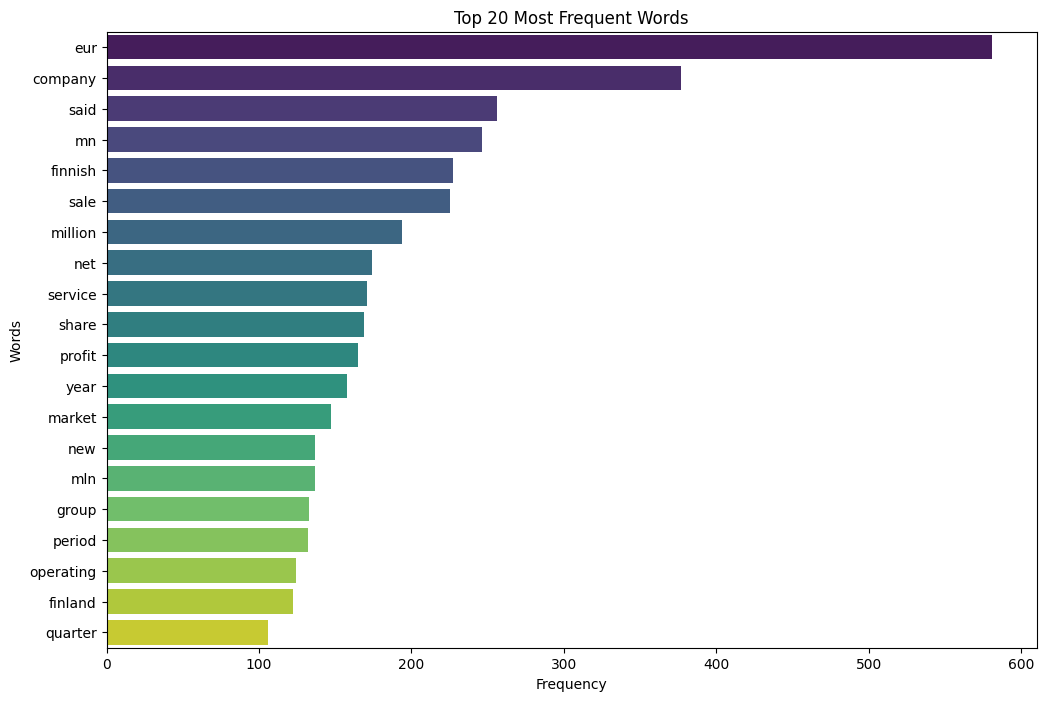

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 20 most frequent words
top_words = word_freq_df.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


#### Plot the full dataset, 2k dataset & the pre-processed dataset as wordcloud now.. and compare!!

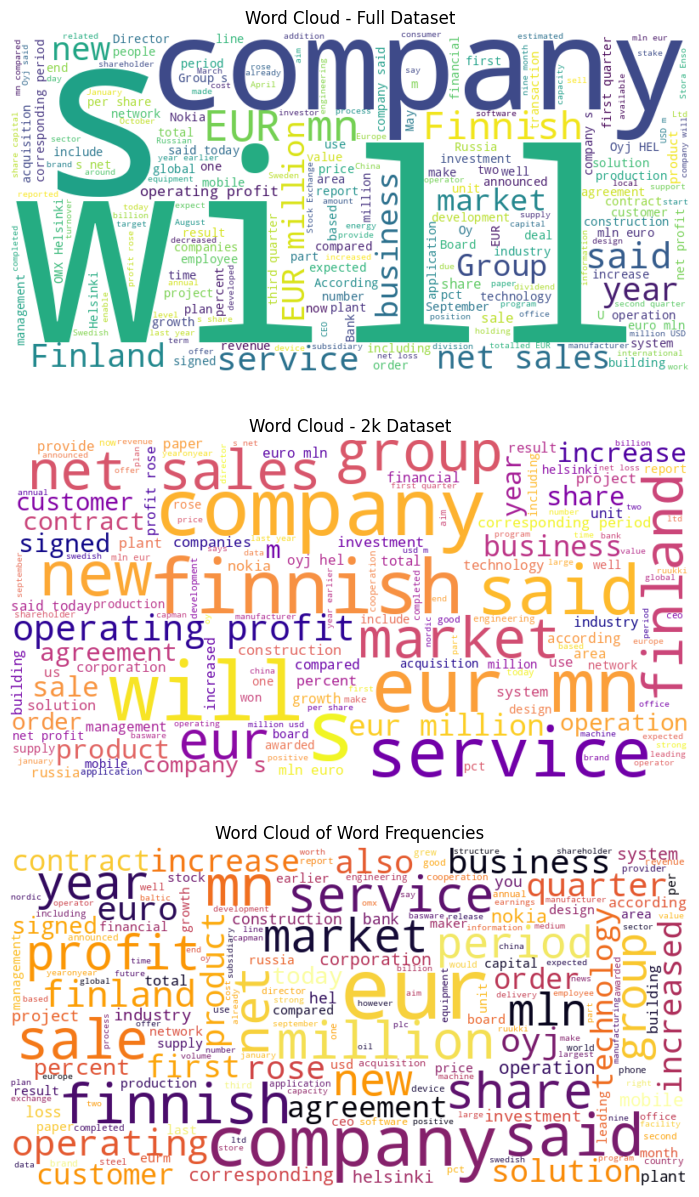

In [130]:
# Combine all headlines into a single string
all_headlines = ' '.join(df['news_headline'])
all_headlines_2k = ' '.join(df2k['news_headline'])

# Generate the word cloud
wordcloud1 = WordCloud(width=800, 
                       height=400, 
                       background_color='white', 
                       
                       contour_width=3,  # Width of the contour
                       contour_color='blue',  # Color of the contour
                       colormap='viridis'                       
                      ).generate(all_headlines)
wordcloud2 = WordCloud(width=800,
                       height=400,
                       max_font_size=100,
                       min_font_size=10,
                       background_color='white',
                       colormap='plasma'
                      ).generate(all_headlines_2k)
wordcloud3 = WordCloud(width=800,
                       height=400,
                       max_font_size=100,
                       min_font_size=10,
                       background_color='white',                       
                       colormap='inferno'
                      ).generate_from_frequencies(word_frequency)
fig, axes = plt.subplots(3, 1, figsize=(12, 15))
# Display the first word cloud
axes[0].imshow(wordcloud1, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title('Word Cloud - Full Dataset')
# Display the second word cloud
axes[1].imshow(wordcloud2, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title('Word Cloud - 2k Dataset')

axes[2].imshow(wordcloud3, interpolation="bilinear")
axes[2].axis("off")
axes[2].set_title('Word Cloud of Word Frequencies')
# plt.subplots_adjust(wspace=0.5)
# plt.axvline(x=10, color='gray', linestyle='--')
plt.show()

# **Task 2** : Implementing Parsing Algorithms 

### 1. Display the POS tagging on the first 2 rows of ‘News Headlines’ 

Use the NLTK pos_tag function to generate Part-of-Speech tags for the words in the first two rows of the dataset.

In [2]:
import pandas as pd
# Load the dataset
colnames = ['Sentiment', 'News Headline']
data = pd.read_csv("all-data.csv",  names=colnames, encoding="windows_1258")
#data.style

In [137]:
# Display POS tagging for the first 2 rows
import nltk
from nltk import pos_tag, word_tokenize
import pandas as pd

# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Tokenize the first two headlines
headline_1 = word_tokenize(data['News Headline'][0])
headline_2 = word_tokenize(data['News Headline'][1])

# POS tagging for the first two headlines
pos_tags_1 = pos_tag(headline_1)
pos_tags_2 = pos_tag(headline_2)

print("POS tagging for headline 1:\n", pos_tags_1)
print ("\n") 
print("POS tagging for headline 2:\n", pos_tags_2)

POS tagging for headline 1:
 [('According', 'VBG'), ('to', 'TO'), ('Gran', 'NNP'), (',', ','), ('the', 'DT'), ('company', 'NN'), ('has', 'VBZ'), ('no', 'DT'), ('plans', 'NNS'), ('to', 'TO'), ('move', 'VB'), ('all', 'DT'), ('production', 'NN'), ('to', 'TO'), ('Russia', 'NNP'), (',', ','), ('although', 'IN'), ('that', 'DT'), ('is', 'VBZ'), ('where', 'WRB'), ('the', 'DT'), ('company', 'NN'), ('is', 'VBZ'), ('growing', 'VBG'), ('.', '.')]


POS tagging for headline 2:
 [('Technopolis', 'NNP'), ('plans', 'VBZ'), ('to', 'TO'), ('develop', 'VB'), ('in', 'IN'), ('stages', 'NNS'), ('an', 'DT'), ('area', 'NN'), ('of', 'IN'), ('no', 'DT'), ('less', 'JJR'), ('than', 'IN'), ('100,000', 'CD'), ('square', 'JJ'), ('meters', 'NNS'), ('in', 'IN'), ('order', 'NN'), ('to', 'TO'), ('host', 'VB'), ('companies', 'NNS'), ('working', 'VBG'), ('in', 'IN'), ('computer', 'NN'), ('technologies', 'NNS'), ('and', 'CC'), ('telecommunications', 'NNS'), (',', ','), ('the', 'DT'), ('statement', 'NN'), ('said', 'VBD'), (

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usha_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\usha_\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### 2. Plot the Dependency Parser for Random Sentences with At Least 10 Words

For dependency parsing, use the spacy library since the NLTK doesn't natively support dependency parsing. 
If you want to stick with NLTK, it might require custom implementations or additional external tools like Stanford Parser.

In [18]:
# 2. Plot the dependency parser for any two random sentences with at least 10 words
import spacy
import random
from spacy import displacy

# Load the dataset
colnames = ['Sentiment', 'News Headline']
data = pd.read_csv("all-data.csv",  names=colnames, encoding="windows_1258")

nlp = spacy.load('en_core_web_sm')

# Filter sentences with at least 10 words
long_sentences = [sent for sent in data['News Headline'] if len(sent.split()) >= 10]

# Select two random sentences
random_sentences = random.sample(long_sentences, 2)

# Plot dependency parser
for sentence in random_sentences:
    doc = nlp(sentence)
    print (f"\nThe sentence..\n{sentence}")
    displacy.render(doc, style="dep", jupyter=True)



The sentence..
Nokia s U.S. shares were 3.3 percent lower at $ 12.73 by 1750 GMT .



The sentence..
The offer represents a premium of 24 % over the stock 's closing price on Friday .


In [6]:
#!pip install spacy

## 3. Plot the Statistical Parser for Random Sentences with At Least 10 Words

For statistical parsing, NLTK’s Viterbi Parser or Probabilistic CKY can be used if you have a Probabilistic Context-Free Grammar (PCFG). However, for simplicity, we’ll use NLTK's built-in grammar and parser to show how statistical parsing can be done. Let’s create a basic grammar:

In [22]:
import random
import pandas as pd
import nltk
from nltk.parse.stanford import StanfordParser
from nltk.tree import Tree
import os
os.environ['JAVAHOME'] = 'C:/Program Files/Java/jdk-22/'
# -----------display ----------------
from IPython.core.interactiveshell import InteractiveShell
# Increase the output display limit
InteractiveShell.ast_node_interactivity = "all"

# Set up the Stanford Parser (make sure the environment variables are set correctly)
# Path to Stanford parser .jar files
stanford_parser_dir = "C:/stanford-nlp-resources/stanford-parser-4.2.0/stanford-parser-full-2020-11-17/"
parser = StanfordParser(
    path_to_models_jar=f'{stanford_parser_dir}stanford-parser-4.2.0-models.jar',
    path_to_jar=f'{stanford_parser_dir}stanford-parser.jar'
)

print (random_sentences)

['Nokia s U.S. shares were 3.3 percent lower at $ 12.73 by 1750 GMT .', "The offer represents a premium of 24 % over the stock 's closing price on Friday ."]


C:\Users\usha_\AppData\Local\Temp\ipykernel_7656\499958751.py:16: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  parser = StanfordParser(


In [24]:
# Parse the sentences and visualize
print (f"\nThe selected sentences are..\n{random_sentences}")
print ()
for sentence in random_sentences:
    parse_tree = list(parser.raw_parse(sentence))    
    # Display the parse tree
    for tree in parse_tree:
        tree.pretty_print()  # Print the tree structure


The selected sentences are..
['Nokia s U.S. shares were 3.3 percent lower at $ 12.73 by 1750 GMT .', "The offer represents a premium of 24 % over the stock 's closing price on Friday ."]

                                                ROOT                                       
                                                 |                                          
                                                 S                                         
            _____________________________________|_______________________________________   
           |                                          VP                                 | 
           |                __________________________|_____________________             |  
           |               |                    ADJP                        PP           | 
           |               |               ______|________               ___|____        |  
           NP              |             ADJP             PP           

### 4: Comparing the efficiency of each approach in terms of the number of operations and time taken

The parsing methods used.. 

**Statistical Parser:**
Uses probabilistic models to parse sentences based on a predefined grammar. The parser estimates the most likely parse tree based on the probabilities learned from training data.

**Dependency Parser:**
Directly models the relationships between words (dependencies) in a sentence. It’s typically more focused on syntactic relations rather than generating complete parse trees.

#### Comparision in terms of number of operations

To compare the number of operations, you need to break down the parsing process into its main computational components:
    Tokenization: Splitting the text into words or tokens.
    Parsing: Building the syntactic structure (e.g., parsing tree or dependency graph).
    Post-Processing: Additional steps such as visualization or further analysis.

Statistical parsers often involve:

    Parsing Complexity: Typically involves a dynamic programming approach, such as CKY (Cocke-Younger-Kasami) algorithm, which has a time complexity of 
    𝑂(𝑛^3) for parsing, where 𝑛 is the number of words in the sentence.
    
    Grammar Rules Application: Applying rules from a probabilistic context-free grammar (PCFG), which involves traversing and matching rules to sentence structures.

**A. For statistical parsers like Stanford Parser (as used in this example):**

In [33]:
# Function to estimate operations for statistical parsing
# Assumption: Rough estimate of CKY complexity = n ** 3
def count_statistical_parser_operations(sentences):    
    num_operations = 0
    for sentence in sentences:
        # Tokenize
        tokens = sentence.split()
        num_tokens = len(tokens)        
        num_operations += num_tokens ** 3      
    return num_operations

# Calculate operations for selected sentences
statistical_operations = count_statistical_parser_operations(random_sentences)
print(f"Estimated number of operations for Statistical Parser: {statistical_operations}")

Estimated number of operations for Statistical Parser: 8288


**B. Counting Operations in Dependency Parsing**

Dependency parsers involve:

Dependency Parsing Complexity: Often involves algorithms like transition-based parsing or graph-based parsing. Time complexity can be linear with respect to sentence length, 𝑂(𝑛), but the exact number of operations can vary based on the algorithm and implementation.

Dependency Relation Computation: Identifying and establishing relations between tokens.
Example: For dependency parsers like Spacy as used in this assignment.

In [39]:
# Function to estimate operations for dependency parsing
# Rough estimate for dependency parsing = num_tokens
def count_dependency_parser_operations(sentences):
    num_operations = 0
    for sentence in sentences:
        doc = nlp(sentence)
        num_tokens = len(doc)        
        num_operations += num_tokens      
    return num_operations

# Calculate operations for selected sentences
dependency_operations = count_dependency_parser_operations(random_sentences)
print(f"Estimated number of operations for Dependency Parser: {dependency_operations}")

Estimated number of operations for Dependency Parser: 32


In [30]:
# Compare the efficiency of each approach
# To compare the efficiency, we can measure the time taken for each approach:
import time
from nltk import pos_tag, word_tokenize

# POS tagging timing
start_time = time.time()
for _ in range(100):  # Test over 100 iterations for accuracy
    pos_tags = pos_tag(word_tokenize(data['News Headline'][0]))
pos_time = time.time() - start_time

# Measure time for spaCy dependency parsing
start_time = time.time()
for sentence in random_sentences:
    doc = nlp(sentence)
end_time = time.time()
spacy_time = end_time - start_time

# Measure time for NLTK statistical parsing
start_time = time.time()
for sentence in random_sentences:
    parse = next(parser.raw_parse(sentence))
end_time = time.time()
nltk_time = end_time - start_time

print (f"POS Tagging time: {pos_time} seconds")
print(f"spaCy dependency parsing time: {spacy_time} seconds")
print(f"NLTK statistical parsing time: {nltk_time} seconds")

POS Tagging time: 0.11790204048156738 seconds
spaCy dependency parsing time: 0.00989222526550293 seconds
NLTK statistical parsing time: 2.4309120178222656 seconds


### Conclusion:

In [41]:
print(f"For dependency parsers..")
print(f"spaCy dependency parsing time: {spacy_time} seconds")
print(f"Estimated number of operations for dependency Parser: {dependency_operations}")
print(f"\nFor statistical parsers..")
print(f"NLTK statistical parsing time: {nltk_time} seconds")
print(f"Estimated number of operations for Statistical Parser: {statistical_operations}")

For dependency parsers..
spaCy dependency parsing time: 0.00989222526550293 seconds
Estimated number of operations for dependency Parser: 32

For statistical parsers..
NLTK statistical parsing time: 2.4309120178222656 seconds
Estimated number of operations for Statistical Parser: 8288


Statistical Parsers:
- Tend to have a higher number of operations due to the complexity of probabilistic grammar and the need to consider many possible parse trees.
- consequntly, they also tend to consume more time.

Dependency Parsers: 
- Usually involve fewer operations due to their focus on direct word relations and often use more efficient algorithms.
- consequntly, tend to consume less time.